In [14]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Multinomial linear regression

In [15]:
data = np.loadtxt('../../data/02_LinearRegression/multinomial.csv', delimiter=',')
x, y = data[:,:2], data[:,2:]
m = x.shape[0]

In [16]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
y = (y - np.mean(y)) / np.std(y)

<IPython.core.display.Javascript object>


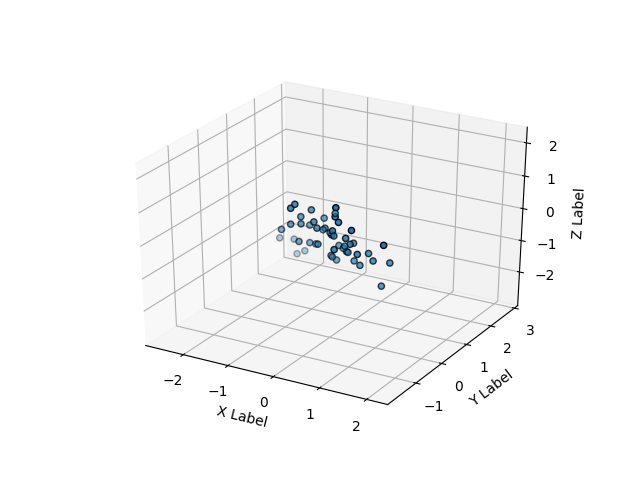

In [17]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(x[:,0], x[:,1], y[:], edgecolors='k', label='Data')
ax.grid(True, color='gray', linestyle='dashed')

## Model

In [18]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [19]:
w = tf.Variable([0.0, 0.0], name="weights")
b = tf.Variable(0.0, name="bias")

In [20]:
Y_predicted = tf.add(tf.matmul(tf.reshape(X, [1, 2]), tf.reshape(w, [2, 1])), b) 

## Cost function

In [21]:
cost = tf.reduce_mean(tf.square(Y - Y_predicted), name="cost")

## Optimization

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

## Train

In [23]:
with tf.Session() as sess:
    
    # Initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    # Train the model in 50 epochs
    for i in range(50):
        
        total_cost = 0
        
        for sample in range(m):
            
            _, l = sess.run([optimizer, cost], feed_dict={X: x[sample], Y:y[sample]}) 
            
            total_cost += l
        
        # Print epoch and loss
        print('Epoch {0}: {1}'.format(i, total_cost / m))

    # Output the values of w and b
    w, b = sess.run([w, b]) 
    
    # print('Cost: %f' % sess.run(cost, feed_dict={X: x, Y: y}))

Epoch 0: 0.89767242428381
Epoch 1: 0.7120937642850913
Epoch 2: 0.5829776878933626
Epoch 3: 0.49267025300621753
Epoch 4: 0.4290514954249375
Epoch 5: 0.383800403817404
Epoch 6: 0.35120318293571473
Epoch 7: 0.3273360309842974
Epoch 8: 0.30950405114330354
Epoch 9: 0.29585569134913386
Epoch 10: 0.2851185399858514
Epoch 11: 0.276417773575522
Epoch 12: 0.26915174681693316
Epoch 13: 0.26290596863254906
Epoch 14: 0.2573950084694661
Epoch 15: 0.25242184262722733
Epoch 16: 0.2478500146337319
Epoch 17: 0.24358506640885025
Epoch 18: 0.23956117351975992
Epoch 19: 0.23573221861763158
Epoch 20: 0.23206576858115113
Epoch 21: 0.22853860911625135
Epoch 22: 0.22513417667890395
Epoch 23: 0.2218402549566963
Epoch 24: 0.21864771313827078
Epoch 25: 0.21554965944509605
Epoch 26: 0.2125406484674022
Epoch 27: 0.20961623227180098
Epoch 28: 0.20677277441471234
Epoch 29: 0.20400715473660966
Epoch 30: 0.20131662528263405
Epoch 31: 0.19869872523937374
Epoch 32: 0.19615116812768973
Epoch 33: 0.19367186934687197
Epoch 

<IPython.core.display.Javascript object>


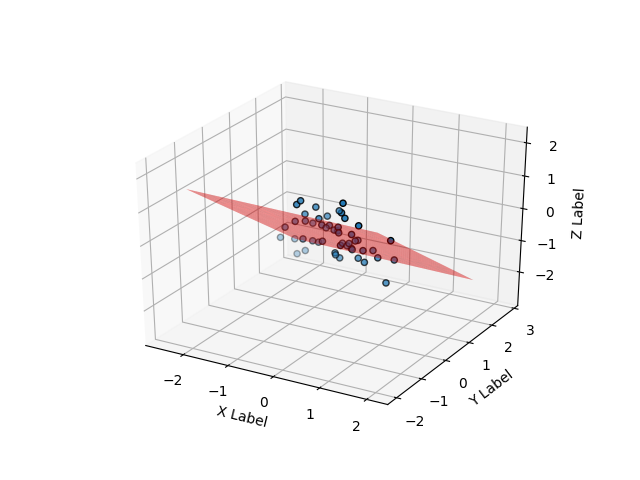

In [24]:
x1, x2 = np.meshgrid(np.linspace(-2.0, 2.0, 100), np.linspace(-2.0, 2.0, 100))
y1 = x1 * w[0] + x2 * w[1] + b
ax.plot_surface(x1, x2, y1, color='r', alpha=0.5)
fig

# Polynomial regression

In [25]:
# Load data as numpy array
x, y = np.loadtxt('../../data/02_LinearRegression/polynomial.csv', delimiter=',', unpack=True)
m = x.shape[0]

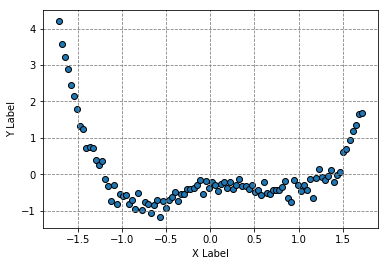

In [26]:
# Graphical preview
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.scatter(x, y, edgecolors='k', label='Data')
ax.grid(True, color='gray', linestyle='dashed')

## Model

In [27]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [28]:
W = tf.Variable(tf.random_normal([6]), name="weights")

In [29]:
Y_predicted = tf.slice(W, [0], [1])

In [30]:
for i in range(1, 6):
    Y_predicted = tf.add(tf.multiply(tf.pow(X, i), tf.slice(W, [i], [1])), Y_predicted)

## Cost function

In [31]:
cost = tf.reduce_mean(tf.square(Y - Y_predicted), name='cost')

## Optimization

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

## Train

In [33]:
with tf.Session() as sess:
    
    # Initialize the necessary variables
    sess.run(tf.global_variables_initializer()) 

    # Train the model in 500 epochs
    for i in range(500):
        
        total_cost = 0
        
        for sample in range(m):
            
            _, l = sess.run([optimizer, cost], feed_dict={X: x[sample], Y:y[sample]}) 
            
            total_cost += l
        
        if i % 10 == 0:
            # Print epoch and loss
            print('Epoch {0}: {1}'.format(i, total_cost / m))
 
    # Output the value of w
    w = sess.run(W)

Epoch 0: 7.0865222642570735
Epoch 10: 0.13253400212135602
Epoch 20: 0.0607411243329625
Epoch 30: 0.046879349208442986
Epoch 40: 0.042011490341392344
Epoch 50: 0.03911827442600952
Epoch 60: 0.03696213138185158
Epoch 70: 0.03523612393475105
Epoch 80: 0.03382168523987275
Epoch 90: 0.032652378226493965
Epoch 100: 0.03168198792587305
Epoch 110: 0.030875053928512558
Epoch 120: 0.030203279533552632
Epoch 130: 0.029643424803085735
Epoch 140: 0.029176422057760193
Epoch 150: 0.02878656252839903
Epoch 160: 0.028460805289893188
Epoch 170: 0.028188349470538013
Epoch 180: 0.02796026457275957
Epoch 190: 0.027769088177587945
Epoch 200: 0.02760868224719161
Epoch 210: 0.027473930726756066
Epoch 220: 0.02736056349954879
Epoch 230: 0.0272650780685899
Epoch 240: 0.027184526402998017
Epoch 250: 0.027116461607029123
Epoch 260: 0.02705886424810615
Epoch 270: 0.027010039301985672
Epoch 280: 0.026968567930225618
Epoch 290: 0.026933267599815736
Epoch 300: 0.026903180071731186
Epoch 310: 0.026877469779127524
Epoc

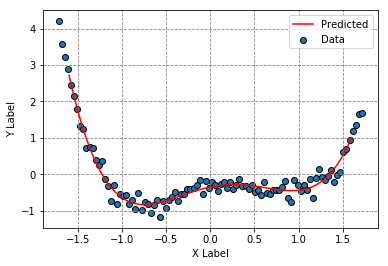

In [34]:
# Append hypothesis that we found on the plot
x1 = np.linspace(-1.6, 1.6, num=100)
y1 = sum([w[i] * x1 ** i for i in range(6)])
ax.plot(x1, y1, color='r', label='Predicted')
ax.legend()
fig